In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

steel_industry_energy_consumption = fetch_ucirepo(id=851)

X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets


In [ ]:
import pandas as pd
data = X.join(y)
data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
X.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week'],
      dtype='object')

In [ ]:
data = pd.get_dummies(data, columns=['WeekStatus', 'Day_of_week'], drop_first=True)

In [ ]:
data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Light_Load,False,True,False,False,False,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Light_Load,False,True,False,False,False,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Light_Load,False,True,False,False,False,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Light_Load,False,True,False,False,False,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Light_Load,False,True,False,False,False,False,False


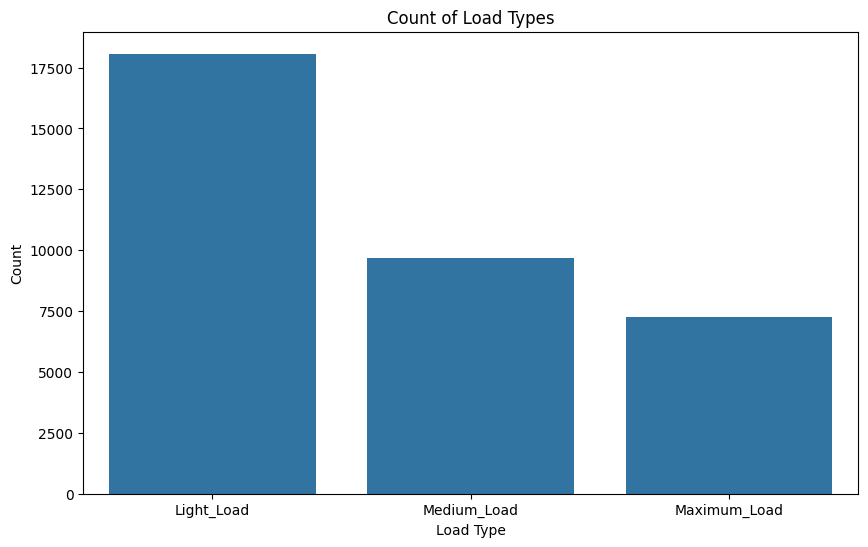

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Load_Type', data=y)
plt.title('Count of Load Types')
plt.xlabel('Load Type')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Load_Type'] = label_encoder.fit_transform(data['Load_Type'])
y['Load_Type'] = label_encoder.fit_transform(y['Load_Type'])

<ipython-input-16-e9c2311b0cbe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Load_Type'] = label_encoder.fit_transform(y['Load_Type'])


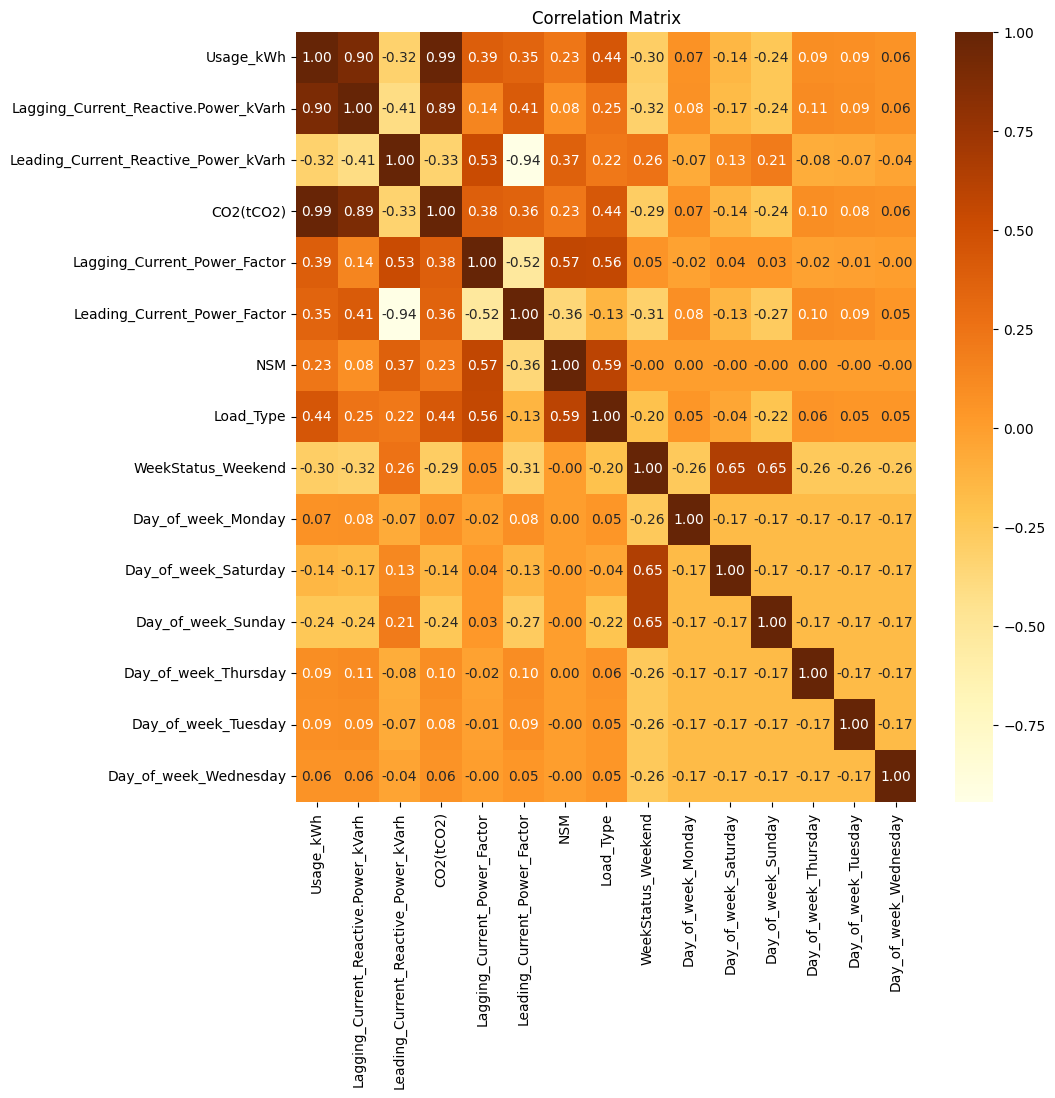

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='YlOrBr')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X["WeekStatus"] = label_encoder.fit_transform(X["WeekStatus"])
X["Day_of_week"] = label_encoder.fit_transform(X["Day_of_week"])

<ipython-input-22-e506a0896f86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["WeekStatus"] = label_encoder.fit_transform(X["WeekStatus"])
<ipython-input-22-e506a0896f86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Day_of_week"] = label_encoder.fit_transform(X["Day_of_week"])


In [ ]:
X

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,1
...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,1
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3572
           1       0.83      0.84      0.84      1499
           2       0.85      0.83      0.84      1937

    accuracy                           0.91      7008
   macro avg       0.89      0.89      0.89      7008
weighted avg       0.91      0.91      0.91      7008



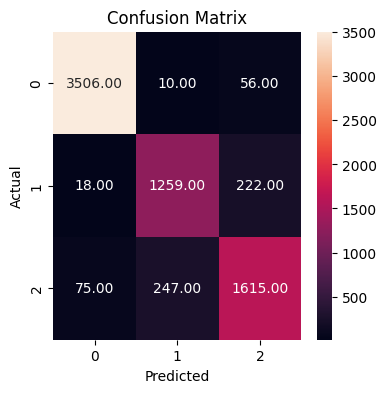

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Accuracy: 0.8874143835616438


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[3496   13   63]
 [  19 1250  230]
 [  73  247 1617]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3572
           1       0.83      0.83      0.83      1499
           2       0.85      0.83      0.84      1937

    accuracy                           0.91      7008
   macro avg       0.88      0.88      0.88      7008
weighted avg       0.91      0.91      0.91      7008

